In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_chamfer import MCUChamferModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [5]:
figure_num = 16**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
noise_level = 0
lw = np.array([10, -75, 0])
up = np.array([170, 75, 170])
param_names = np.array(["inside_angle", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)


In [ ]:
mcu_model.train(max_iters=100)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

In [ ]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [11]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt = 200, noise_level = 0, pieces_cnt=5, test_data_size=10, same_value=False)

Finding neighbors: 388 ms , optimization: 1 ms
-----------
x_opt  = [157.52740002 -42.49432027 -59.13353836], x_err = 0.5000722325300659
x_real = [ 42.32212543 -61.24699356 -67.66965537]
Finding neighbors: 401 ms , optimization: 1 ms
-----------
x_opt  = [268.58973446 -33.8043787  -57.58078599], x_err = 0.4832985266565509
x_real = [ 17.50442475 -45.8140175  -65.25061414]
Finding neighbors: 408 ms , optimization: 0 ms
-----------
x_opt  = [181.78121115 -60.75305079 -53.87448988], x_err = 0.6008933050421448
x_real = [  6.17980555 -62.46102403 -59.84141073]
Finding neighbors: 393 ms , optimization: 1 ms
-----------
x_opt  = [168.43324076 -28.18065721 -47.16819335], x_err = 0.44409391346200927
x_real = [ 71.28874456 -53.13878327 -47.24026475]
Finding neighbors: 393 ms , optimization: 1 ms
-----------
x_opt  = [324.87049746 -34.85353591 -58.77055383], x_err = 0.0012818989157546146
x_real = [ 40.52646273 -73.71487988 -56.34636358]
Finding neighbors: 392 ms , optimization: 1 ms
-----------
x_

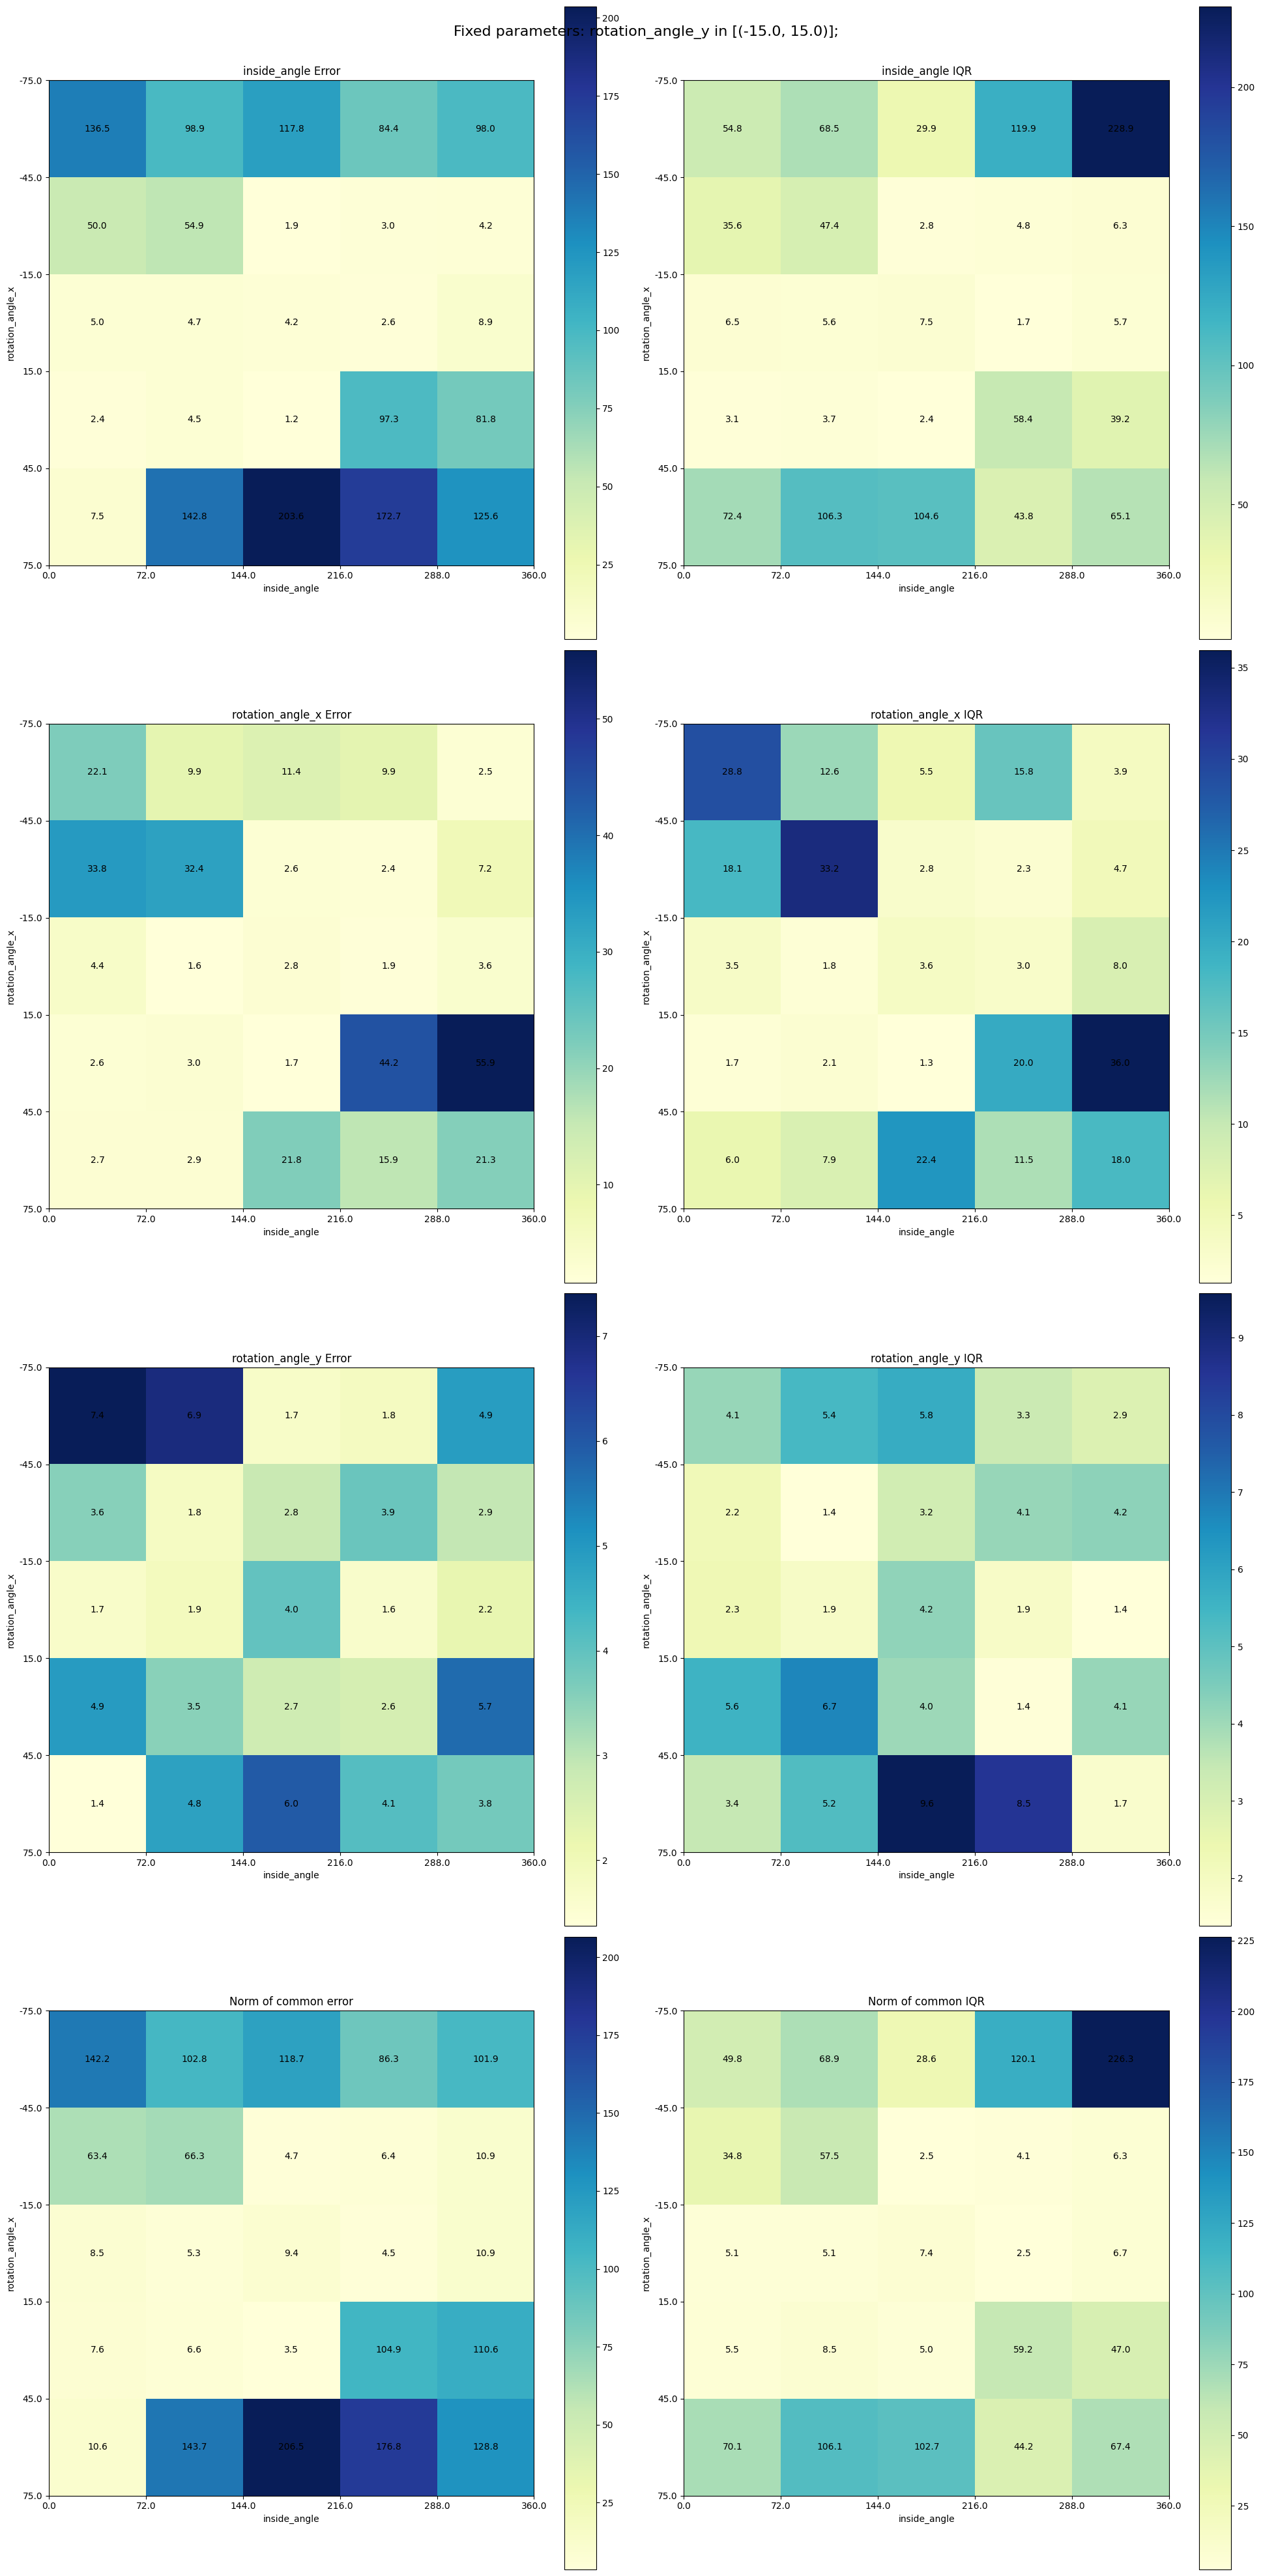

In [15]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map={2:2}, filename="ch_angle_3d")